In [285]:
import numpy as np
import random
import matplotlib.pyplot as plt



3.1 Convergence and attractors

In [286]:
def signum(x):
    return np.where(x>=0,1,-1)
    
x1=[-1,-1, 1,-1, 1,-1,-1, 1] 
x2=[-1, -1,-1,-1,-1, 1,-1,-1] 
x3=[-1, 1, 1,-1, -1, 1,-1, 1]
n=len(x1)
#coefficient for the weight matrix for hebbian learning
w=[[0 for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(n):
        w[i][j]=x1[i]*x1[j]+x2[i]*x2[j]+x3[i]*x3[j]

W=np.array(w)
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)

#Check if the network was able to store all three patterns
x1t=signum(np.dot(W,x1))
x2t=signum(np.dot(W,x2))
x3t=signum(np.dot(W,x3))

print(np.sum(x1t-x1))
print(np.sum(x2t-x2))
print(np.sum(x3t-x3))

0
0
0


In [287]:
x1d=[1,-1, 1,-1, 1,-1,-1, 1] 
x2d=[1, 1,-1,-1,-1, 1,-1,-1] 
x3d=[1, 1, 1,-1, 1, 1,-1, 1]
x1d=np.array(x1d)
x2d=np.array(x2d)
x3d=np.array(x3d)

In [288]:
#apply the update rule until you reach a fixed point
x1t=signum(np.dot(W,x1d))
x2t=signum(np.dot(W,x2d))
x3t=signum(np.dot(W,x3d))

while np.sum(x1t-x1d)!=0:
    x1d=x1t
    x1t=signum(np.dot(W,x1d))
while np.sum(x2t-x2d)!=0:
    x2d=x2t
    x2t=signum(np.dot(W,x2d))
while np.sum(x3t-x3d)!=0:
    x3d=x3t
    x3t=signum(np.dot(W,x3d))

print(np.sum(x1t-x1))
print(np.sum(x2t-x2))
print(x2t)
print(np.sum(x3t-x3))


0
2
[-1  1 -1 -1 -1  1 -1 -1]
0


In [308]:
def help(x):
    x=int(x)
    if x==0:
        return -1
    else:
        return 1

def help2(x,attractors):
    for i in attractors:
        if np.sum(x-i)==0:
            return False
    return True
#find the attractors
attractors=[]
previous = np.zeros(n)
for i in range(2**n):
    x=np.array([help(x) for x in list(np.binary_repr(i,width=n))])
    while np.sum(x-signum(np.dot(W,x)))!=0:
        x=signum(np.dot(W,x))
    if help2(x,attractors):
        attractors.append(x)
attractors=np.array(attractors)
print(attractors)


[[-1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1  1 -1 -1  1 -1  1]
 [-1 -1  1 -1  1  1 -1  1]
 [ 1  1 -1  1 -1  1  1 -1]
 [ 1  1  1  1  1 -1  1  1]
 [-1  1 -1 -1 -1  1 -1 -1]
 [ 1  1 -1  1  1  1  1 -1]]


In [312]:
print(help2(x2t,attractors))

False


3.2 Sequential Update

In [337]:
#load the file pict.data
with open('pict.dat', 'r') as file:
    data = file.read()
data = data.split(",")
data = [int(x) for x in data]
print(len(data))
pattern=[]
for i in range(11):
    pattern.append(np.array(data[i*1024:(i+1)*1024]))
#weight matrix
W=np.zeros((1024,1024))
for i in range(1024):
    for j in range(1024):
        for k in range(3):
            W[i][j]=W[i][j]+(int(pattern[k][i]))*(int(pattern[k][j]))



11264


In [315]:
print(np.sum(pattern[0]-signum(np.dot(W,pattern[0]))))
print(np.sum(pattern[1]-signum(np.dot(W,pattern[1]))))
print(np.sum(pattern[2]-signum(np.dot(W,pattern[2]))))


0
0
0


In [318]:
x9t = signum(np.dot(W,pattern[9]))
x9d = pattern[9]
x10t = signum(np.dot(W,pattern[10]))
x10d = pattern[10]

while np.sum(x9t-x9d)!=0:
    x9d=x9t
    x9t=signum(np.dot(W,x9d))
while np.sum(x10t-x10d)!=0:
    x10d=x10t
    x10t=signum(np.dot(W,x10d))

print(np.sum(x9t-pattern[0])
      )
print(np.sum(x10t-pattern[1]))
print(np.sum(x10t-pattern[2]))


0
1354
54


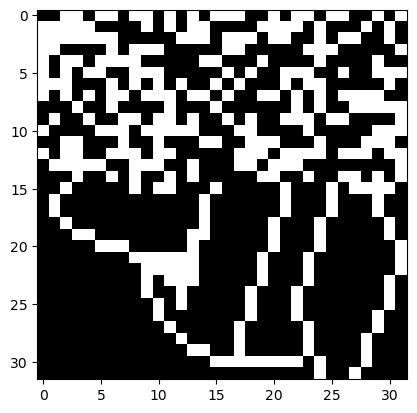

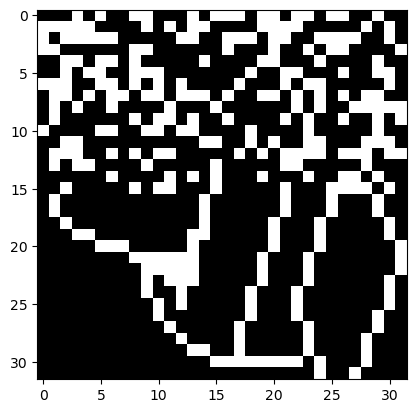

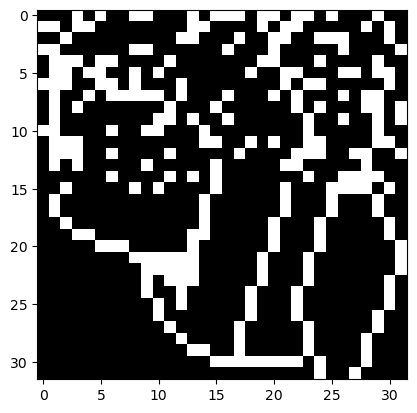

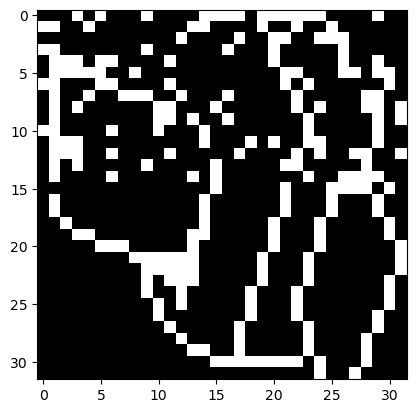

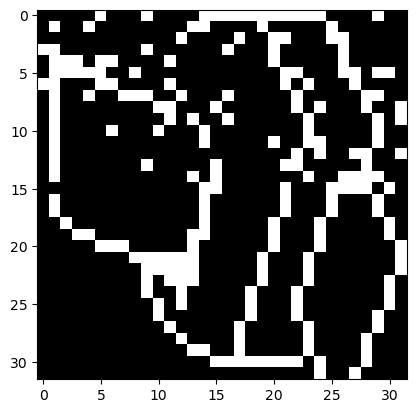

56


In [323]:
#select units ramdomly and update them
test = pattern[9]
for i in range(2000):
    index = random.randint(0,1023)
    test[index] = signum(np.dot(W,test))[index]
    plot = test.reshape(32,32)
    if i%400==0:
        plt.imshow(plot, cmap='gray')
        plt.savefig("pict"+str(i)+".png")
        plt.show()
print(np.sum(test-pattern[0]))


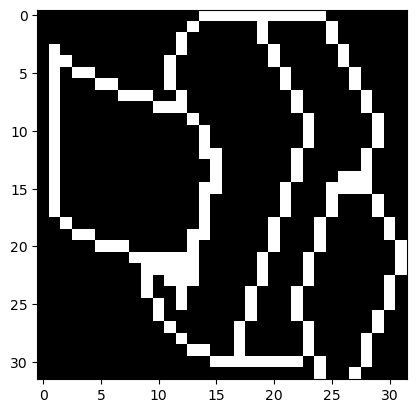

In [324]:
initplot = pattern[0].reshape(32,32)
plt.imshow(initplot, cmap='gray')
plt.savefig("pict_original.png")


3.3 Energy

-1473936.0
-1398416.0
-1497344.0
-1240736.0
-177664.0


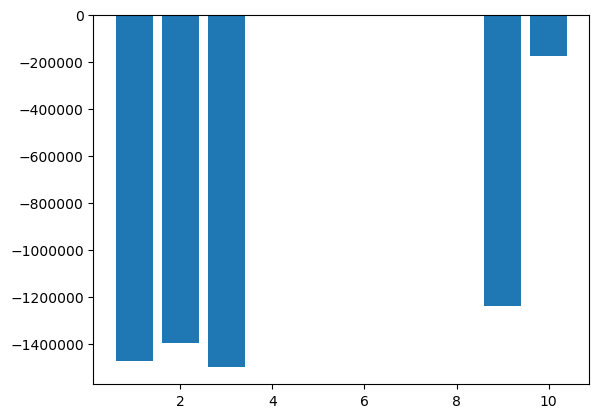

In [328]:
#energie fucntion
def energy(W, x):
    return -np.dot(np.dot(x,W),x)

E1 = energy(W, pattern[0])
E2 = energy(W, pattern[1])
E3 = energy(W, pattern[2])
print(E1)
print(E2)
print(E3)

#energie for the distorted patterns
print(energy(W, pattern[9]))
print(energy(W, pattern[10]))

energies = []
for i in range(3):
    energies.append(energy(W,pattern[i]))
energies.append(energy(W,pattern[9]))
energies.append(energy(W,pattern[10]))
#represent this value in a plot with histogram in x axis we have the number and in the y axis the energy
index = [1,2,3,9,10]
plt.bar(index,energies)
plt.savefig("energies.png")

-425964.0


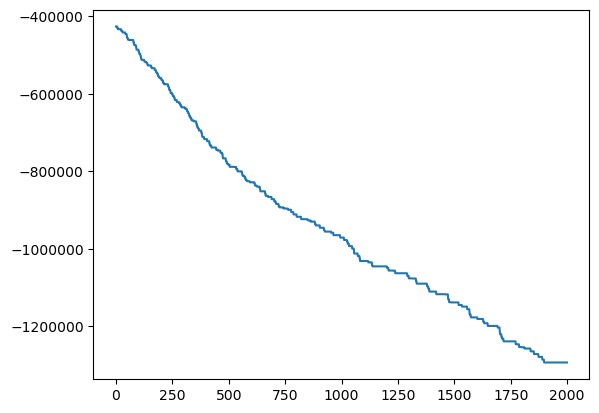

In [338]:
test = pattern[9]
print(energy(W, pattern[9]))
value_energy = []
for i in range(2000):
    index = random.randint(0,1023)
    test[index] = signum(np.dot(W,test))[index]
    value_energy.append(energy(W, test))

plt.plot(value_energy)

plt.savefig("energy_sequential.png")


-886.8936480612487


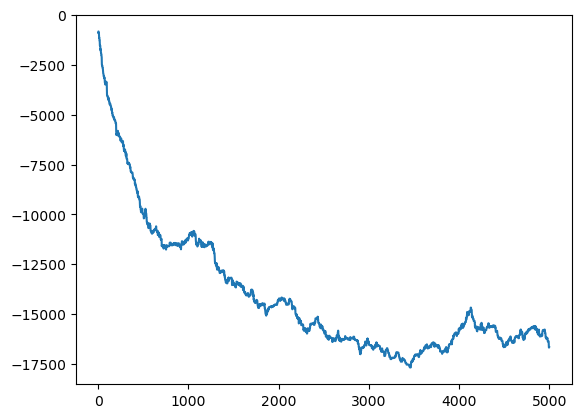

In [334]:
#weight matrix normally distributed
W=np.random.normal(0,1,(1024,1024))
#arbitrary starting point
input2 = pattern[9]
print(energy(W, pattern[9]))
value_energy = []
for i in range(5000):
    index = random.randint(0,1023)
    input2[index] = signum(np.dot(W,input2))[index]
    value_energy.append(energy(W, input2))

plt.plot(value_energy)

plt.savefig("energy_sequential_normal.png")


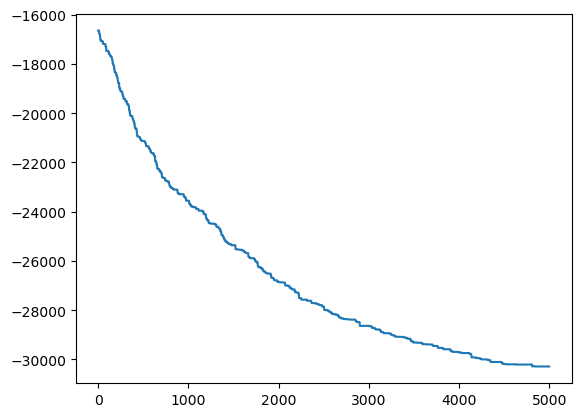

In [335]:
#make the weight matrix symmetric
W = (W + W.T)/2
#arbitrary starting point
input3 = pattern[9]
value_energy = []
for i in range(5000):
    index = random.randint(0,1023)
    input3[index] = signum(np.dot(W,input3))[index]
    value_energy.append(energy(W, input3))

plt.plot(value_energy)

plt.savefig("energy_sequential_normal_symmetric.png")

3.4 Distortion Resistance

In [122]:
#load the file pict.data
with open('pict.dat', 'r') as file:
    data = file.read()
data = data.split(",")
data = [int(x) for x in data]
print(len(data))
pattern=[]
for i in range(11):
    pattern.append(np.array(data[i*1024:(i+1)*1024]))
#weight matrix
W=np.zeros((1024,1024))
for i in range(1024):
    for j in range(1024):
        for k in range(3):
            W[i][j]=W[i][j]+(int(pattern[k][i]))*(int(pattern[k][j]))

W= np.array(W)
pattern = np.array(pattern)


11264


In [130]:
print(np.sum(pattern[0]))

test= signum(np.dot(W,pattern[0]))
print(np.sum(np.abs(test-pattern[0])))
test= signum(np.dot(W,pattern[9]))
print(np.sum(np.abs(test-pattern[9])))

-668
0
482


100


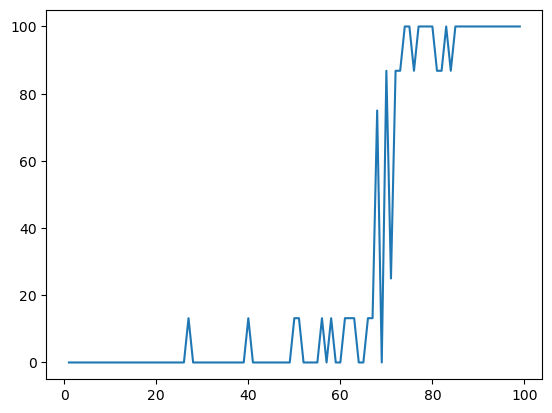

In [133]:
list_noise=[i for i in range(1,100,1)]
diff=[]
count =0
for noise in list_noise:
    #deep copy de list_pict[0]
    test = pattern[0].copy()
    nb_of_flips = noise*1024//100
    index = np.random.randint(0,1023, nb_of_flips)
    test[index] = -test[index]
    while np.sum(np.abs(test-signum(np.dot(W,test)))):
        count+=1
        test=signum(np.dot(W,test))

    diff.append(np.sum(np.abs(test-pattern[0]))/1024*50)
print(count)
plt.plot(list_noise,diff)
plt.show()



102


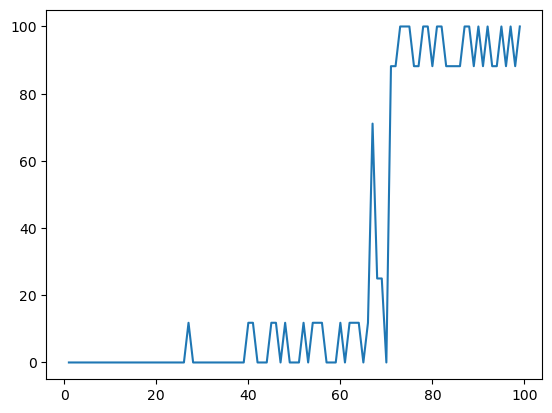

In [136]:
list_noise=[i for i in range(1,100,1)]
diff=[]
count =0
for noise in list_noise:
    #deep copy de list_pict[0]
    test = pattern[2].copy()
    nb_of_flips = noise*1024//100
    index = np.random.randint(0,1023, nb_of_flips)
    test[index] = -test[index]
    while np.sum(np.abs(test-signum(np.dot(W,test)))):
        count+=1
        test=signum(np.dot(W,test))

    diff.append(np.sum(np.abs(test-pattern[2]))/1024*50)
print(count)
plt.plot(list_noise,diff)
plt.show()


104


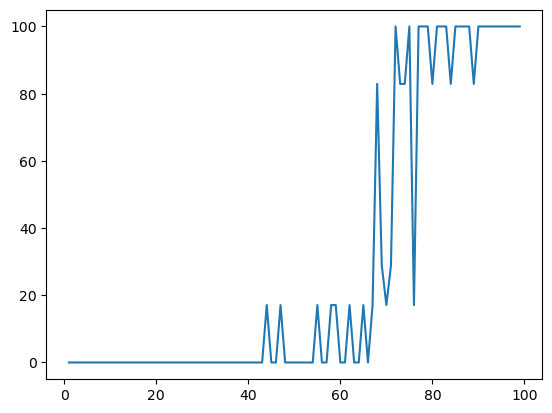

In [134]:

list_noise=[i for i in range(1,100,1)]
diff=[]
count =0
for noise in list_noise:
    #deep copy de list_pict[0]
    test = pattern[1].copy()
    nb_of_flips = noise*1024//100
    index = np.random.randint(0,1023, nb_of_flips)
    test[index] = -test[index]
    while np.sum(np.abs(test-signum(np.dot(W,test)))):
        count+=1
        test=signum(np.dot(W,test))

    diff.append(np.sum(np.abs(test-pattern[1]))/1024*50)
print(count)
plt.plot(list_noise,diff)
plt.show()


3.5 Capacity

In [152]:
#load the file pict.data

with open('pict.dat', 'r') as file:
    data = file.read()
data = data.split(",")
data = [int(x) for x in data]
pattern=[]
for i in range(11):
    pattern.append(np.array(data[i*1024:(i+1)*1024]))
#weight matrix
pattern = np.array(pattern)

In [160]:
result = np.zeros(7)
print(result)
for d in range(7):
    W=np.zeros((1024,1024))
    for i in range(1024):
        for j in range(1024):
            for k in range(d+1):
                W[i][j]=W[i][j]+(int(pattern[k][i]))*(int(pattern[k][j]))
    #test recognition of the patterns
    for f in range(d+1):
        test= signum(np.dot(W,pattern[f]))
        if np.sum(np.abs(test-pattern[f]))==0:
                    result[d]+=1
        else:
             print("error for pattern ", f)


[0. 0. 0. 0. 0. 0. 0.]
error for pattern  0
error for pattern  1
error for pattern  2
error for pattern  3
error for pattern  0
error for pattern  1
error for pattern  2
error for pattern  3
error for pattern  4
error for pattern  0
error for pattern  1
error for pattern  2
error for pattern  3
error for pattern  4
error for pattern  5
error for pattern  0
error for pattern  1
error for pattern  2
error for pattern  3
error for pattern  4
error for pattern  5
error for pattern  6


In [161]:
print(result)

[1. 2. 3. 0. 0. 0. 0.]


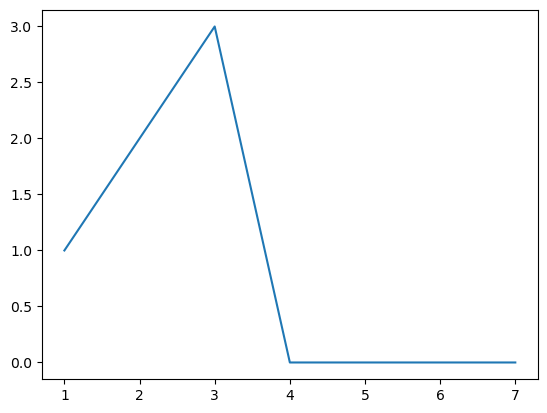

In [162]:
indices = [i+1 for i in range(7)]
plt.plot(indices,result)
plt.show()


In [164]:
W=np.zeros((1024,1024))
for i in range(1024):
    for j in range(1024):
            for k in range(3):
                W[i][j]=W[i][j]+(int(pattern[k][i]))*(int(pattern[k][j]))
    #test recognition of the patterns
for f in range(d+1):
        test= signum(np.dot(W,pattern[f]))
        if np.sum(np.abs(test-pattern[f]))==0:
                    result[d]+=1
        else:
             print("error for pattern ", f)


error for pattern  3
error for pattern  4
error for pattern  5
error for pattern  6


In [174]:
# generate random patterns
pattern = []
for i in range(300):
    pattern.append(np.random.choice([-1,1],1024))
pattern = np.array(pattern)


In [179]:
result = np.ones(100)*100
result[60:]=0
W=np.zeros((1024,1024))
for i in range(1024):
    for j in range(1024):
        for k in range(60):
            W[i][j]=W[i][j]+(int(pattern[k][i]))*(int(pattern[k][j]))
for d in range(60,90,5):
    print(d)
    for i in range(1024):
        for j in range(1024):
            for k in range(60,d+1):
                W[i][j]=W[i][j]+(int(pattern[k][i]))*(int(pattern[k][j]))
    #test recognition of the patterns
    for f in range(d+1):
        test= signum(np.dot(W,pattern[f]))
        if np.sum(np.abs(test-pattern[f]))==0:
                    result[d]+=1
        
    result[d] = result[d]/(d+1)*100

60
65
70
75
80
85


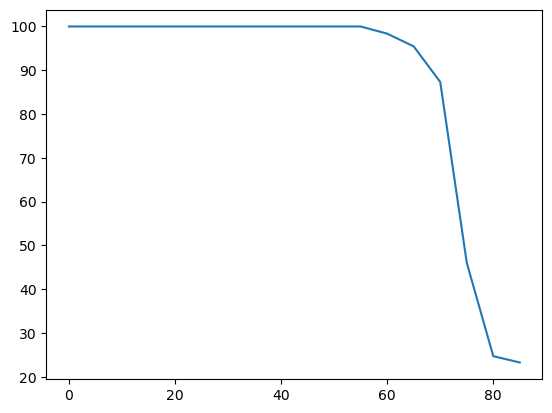

36.93299304675746


In [186]:
value=[]
n=1024
indices = [i for i in range(0,86,5)]
for i in range (0,86,5):
    value.append(result[i])
plt.plot(indices,value)
plt.show()


In [188]:
result = np.ones(100)*100
result[40:]=0
W=np.zeros((1024,1024))
for i in range(1024):
    for j in range(1024):
        if i!=j:
            for k in range(40):
                W[i][j]=W[i][j]+(int(pattern[k][i]))*(int(pattern[k][j]))
for d in range(40,90,5):
    print(d)
    for i in range(1024):
        for j in range(1024):
            for k in range(40,d+1):
                W[i][j]=W[i][j]+(int(pattern[k][i]))*(int(pattern[k][j]))
    #test recognition of the patterns
    for f in range(d+1):
        test= signum(np.dot(W,pattern[f]))
        if np.sum(np.abs(test-pattern[f]))==0:
                    result[d]+=1
        
    result[d] = result[d]/(d+1)*100

40
45
50
55
60
65
70
75
80
85


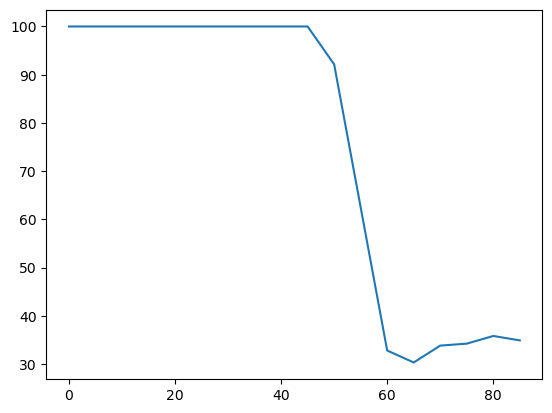

100.0


In [190]:
value=[]
n=1024
indices = [i for i in range(0,86,5)]
for i in range (0,86,5):
    value.append(result[i])
plt.plot(indices,value)
plt.show()
print(result[40])

In [241]:
pattern = signum(0.5+np.random.randn(1024,200)).T

print(pattern[0])
print(pattern.shape)



[-1  1  1 ...  1  1  1]
(200, 1024)


In [242]:
result = np.zeros(100)*100
W=np.zeros((1024,1024))
for d in range(0,25,1):
    print(d)
    for i in range(1024):
        for j in range(1024):
            for k in range(d+1):
                W[i][j]=W[i][j]+(int(pattern[k][i]))*(int(pattern[k][j]))
    #test recognition of the patterns
    for f in range(d+1):
        test= signum(np.dot(W,pattern[f]))
        if np.sum(np.abs(test-pattern[f]))==0:
                    result[d]+=1
        
    result[d] = result[d]/(d+1)*100


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


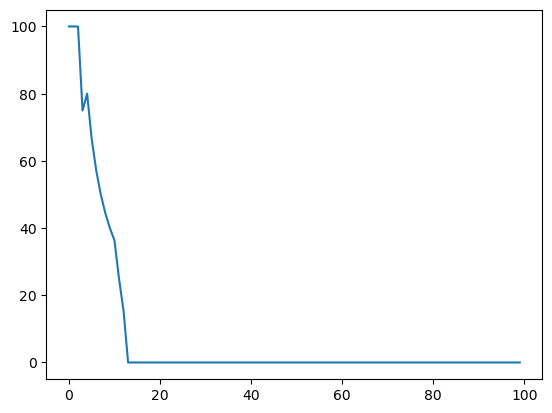

[100.         100.         100.          75.          80.
  66.66666667  57.14285714  50.          44.44444444  40.        ]


In [243]:
value=[]
n=1024
indices = [i for i in range(100)]
plt.plot(indices,result)
plt.show()
print(result[:10])

3.6 Sparse Patterns

In [274]:
#generate sparse patterns with just 10% activity
rho =0.9
def signum2(x):
    return np.where(x>=0,1,0)
patterns = signum2(rho+np.random.randn(1024,200)).T




291
276
294
291
295
297
276
295
296
294
297
296


In [266]:
def result_beta(beta,p=1):
    W=np.zeros((1024,1024))
    result =0
    for i in range(1024):
        for j in range(1024):
            for k in range(p):
                W[i][j]=W[i][j]+(int(pattern[k][i])-rho)*(int(pattern[k][j])-rho)
        
    #test recognition of the patterns
    for f in range(p):
        test=0.5+0.5*np.sign(np.dot(W,pattern[f])-beta)
        if np.sum(np.abs(test-pattern[f]))==0:
            result+=1
    return result/p*100


-5.0
-4.5
-4.0
-3.5
-3.0
-2.5
-2.0
-1.5
-1.0
-0.5
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5


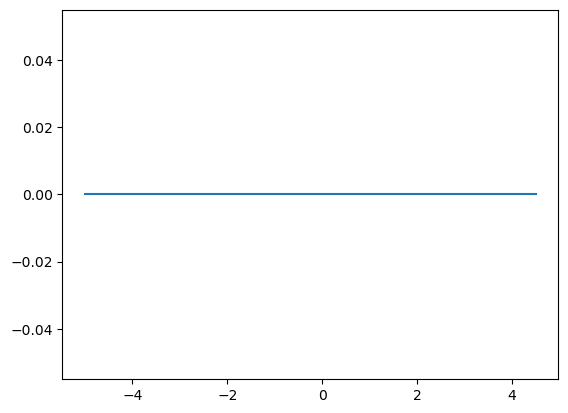

In [273]:
list_beta = [i/2 for i in range(-10,10,1)]
result=[]
for beta in list_beta:
    print(beta)
    result.append(result_beta(beta,4))
plt.plot(list_beta,result)
plt.show()